### Bankruptcy Analysis 

此數據取自台灣經濟新報(TEJ)，時間為1999年至2009年，內容包含公司的各項財務指標及破產與否，此分析旨在觀察各財務指標對於破產的影響程度，以及建立模型預估公司破產的可能性。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
raw_data = pd.read_csv('kaggle_bankruptcy_data.csv')
raw_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
df = raw_data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
print('Null:' + str(df.isnull().sum().sum()))

Null:0


In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [8]:
df.columns = [i.title().strip() for i in list(df.columns)]

In [9]:
print('category_features:\n')
print(df.dtypes[df.dtypes == 'int64'])

category_features:

Bankrupt?                int64
Liability-Assets Flag    int64
Net Income Flag          int64
dtype: object


In [10]:
category_features = df[['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']]
numeric_features = df.drop(category_features, axis = 1)

#### Category data

Liability-Assets Flag : 1 if Total Liability exceeds Total Assets, 0 otherwise<br>
Net Income Flag : 1 if Net Income is Negative for the last two years, 0 otherwise

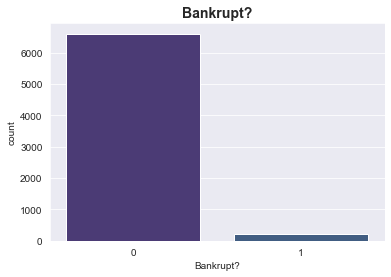

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [11]:
sns.set_style('darkgrid')
sns.set_palette('viridis')
sns.countplot(x = df['Bankrupt?'])
plt.title('Bankrupt?', fontsize = 14, weight = 'bold')
plt.show()
print(df['Bankrupt?'].value_counts())

破產的公司僅占整體樣本的3%左右。

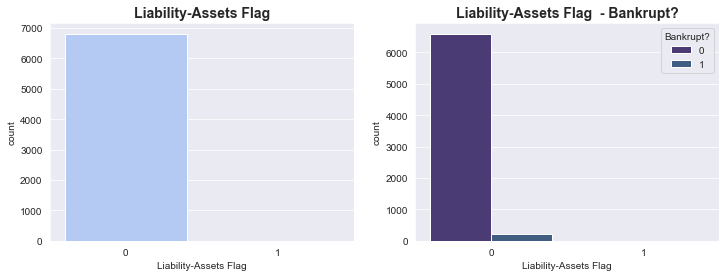

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64 


Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


In [11]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.countplot(x = df['Liability-Assets Flag'], palette = 'coolwarm')
plt.title('Liability-Assets Flag', fontsize = 14, weight = 'bold')
plt.subplot(1,2,2)
sns.countplot(x = df['Liability-Assets Flag'], hue = df['Bankrupt?'])
plt.title('Liability-Assets Flag  - Bankrupt?', fontsize = 14, weight = 'bold')
plt.show()
print(df['Liability-Assets Flag'].value_counts(),'\n\n')
print(df[['Liability-Assets Flag', 'Bankrupt?']].value_counts())

幾乎所有公司的負債皆小於資產，但其中仍有214間公司破產；而負債大於資產的公司中有6間面臨破產。

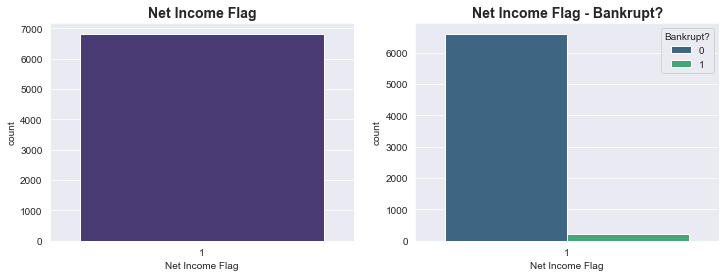

1    6819
Name: Net Income Flag, dtype: int64 


Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


In [12]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.countplot(x = df['Net Income Flag'])
plt.title('Net Income Flag', fontsize = 14, weight = 'bold')
plt.subplot(1,2,2)
sns.countplot(x = df['Net Income Flag'], hue = df['Bankrupt?'], palette = 'viridis')
plt.title('Net Income Flag - Bankrupt?', fontsize = 14, weight = 'bold')
plt.show()
print(df['Net Income Flag'].value_counts(),'\n\n')
print(df[['Net Income Flag', 'Bankrupt?']].value_counts())

所有公司近兩年的淨收入皆為正，但仍有220間公司面臨破產。

#### Numeric data

In [13]:
positive_corr = numeric_features.corrwith(df['Bankrupt?'])[numeric_features.corrwith(df['Bankrupt?'])>0].sort_values(ascending=False).index.tolist()
negative_corr = numeric_features.corrwith(df['Bankrupt?'])[numeric_features.corrwith(df['Bankrupt?'])<0].sort_values(ascending=True).index.tolist()

將變數分類為與破產呈正、負相關，再分別觀察它們對於破產與否的影響程度。

In [14]:
print('positive corr features :', len(positive_corr))
print('negative corr features :', len(negative_corr))

positive corr features : 28
negative corr features : 65


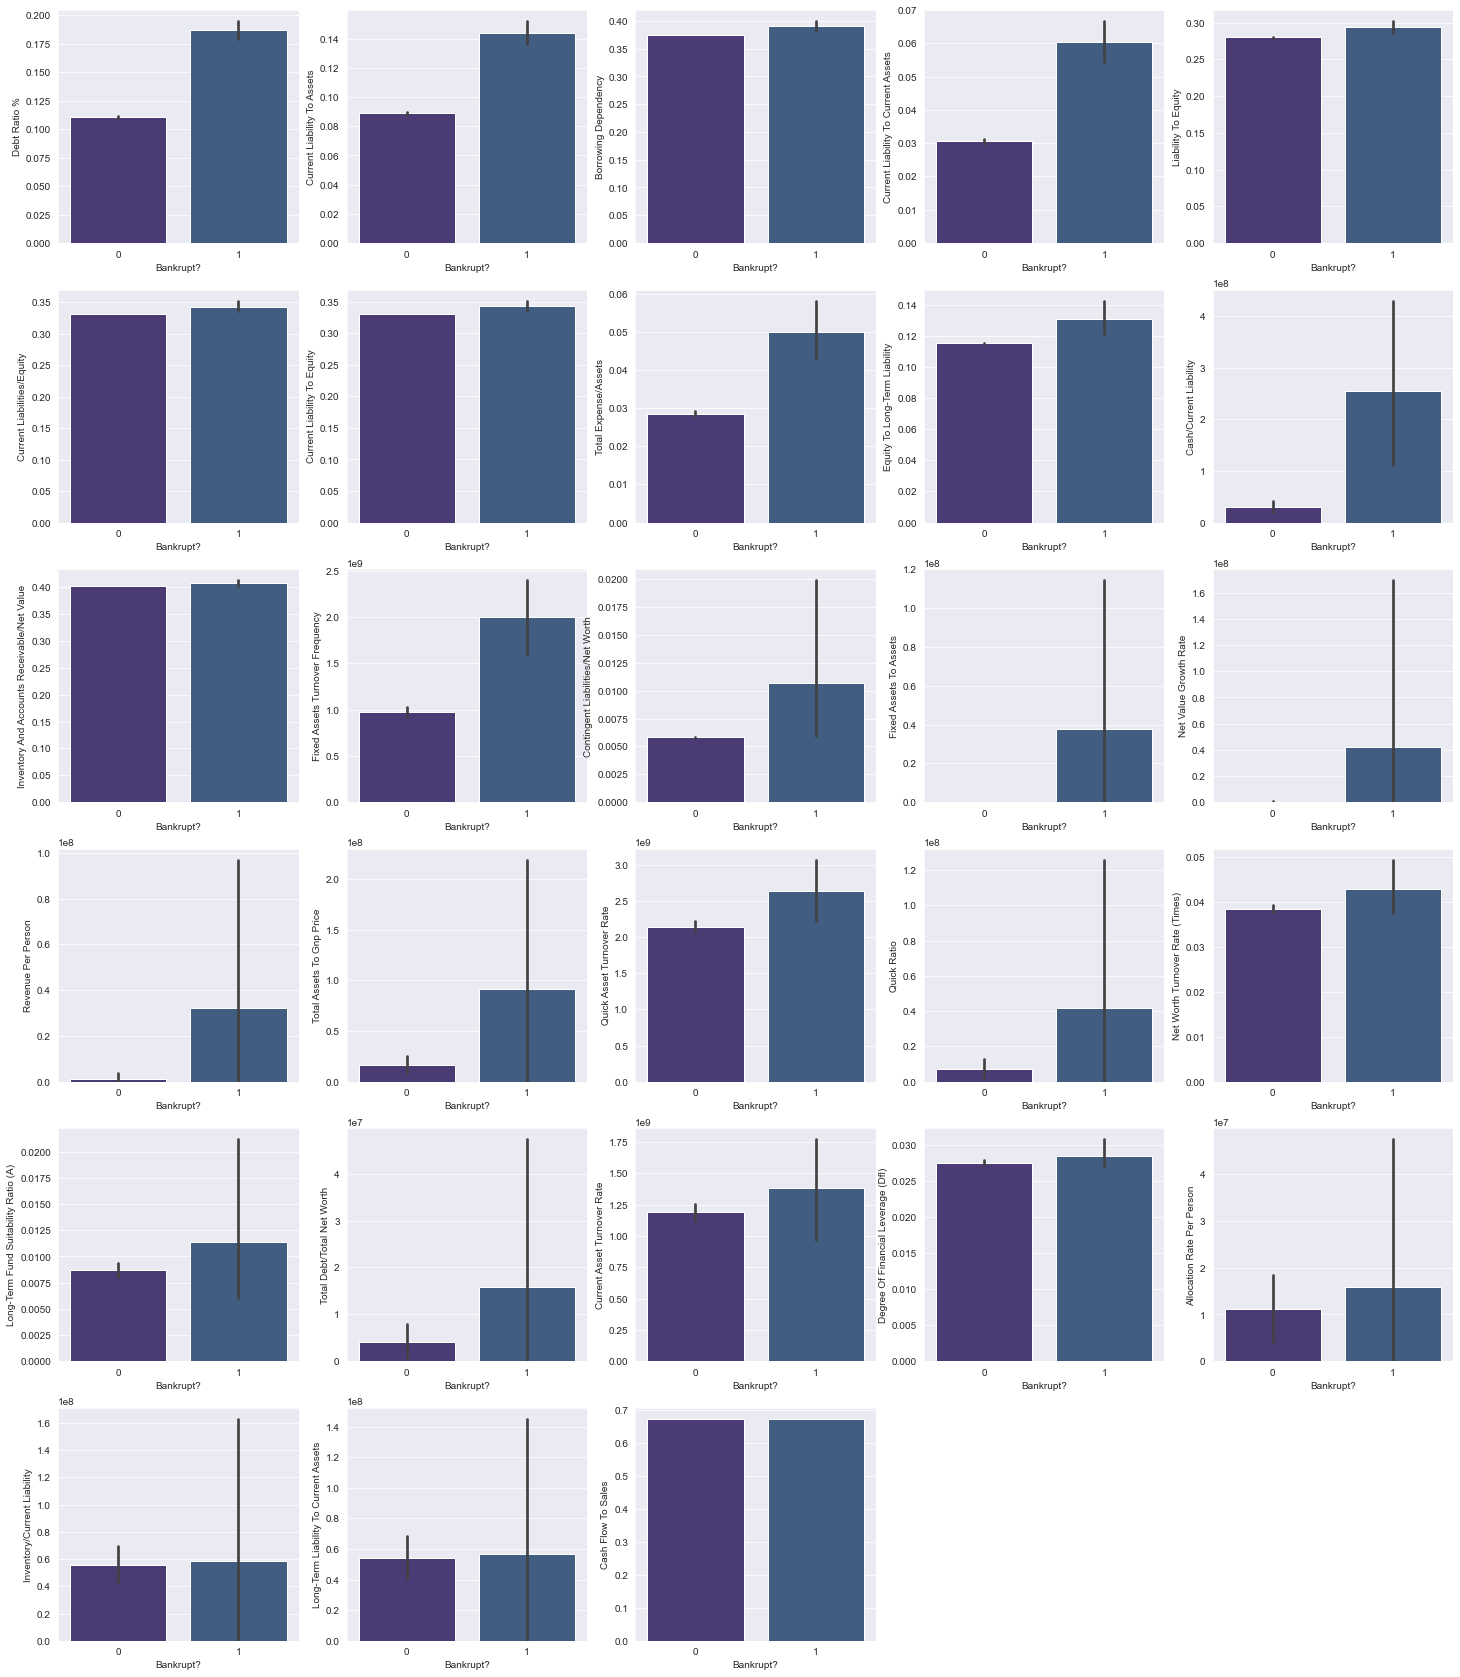

In [15]:
plt.figure(figsize=(25,30))
for i in range(1,29):
    plt.subplot(6,5,i)
    sns.barplot(x = 'Bankrupt?', y = positive_corr[i-1], data = df)
plt.show()

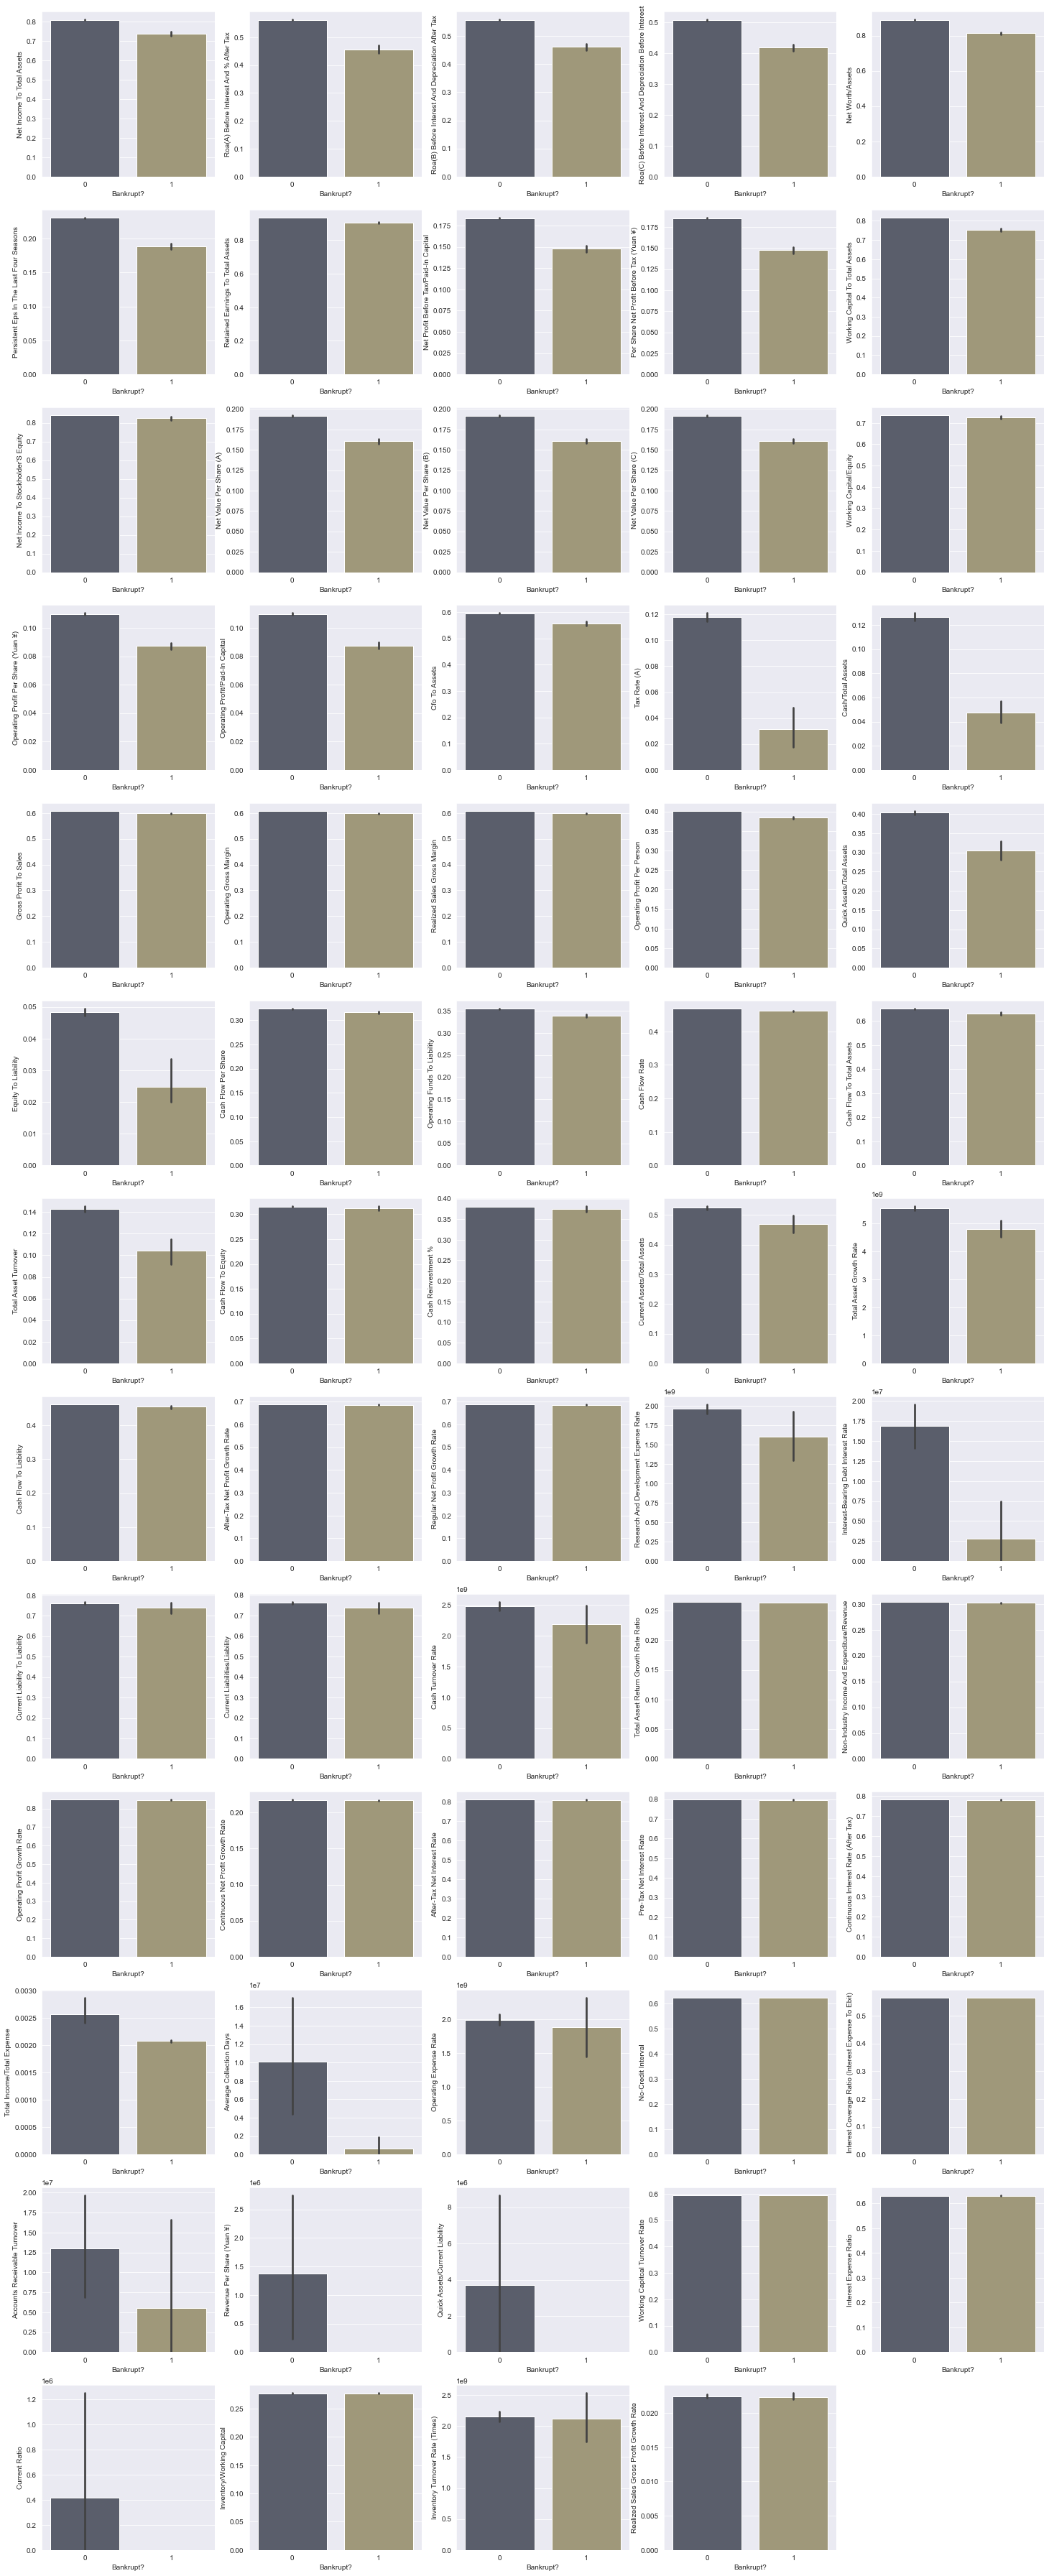

In [16]:
plt.figure(figsize=(25,65))
for i in range(1,65):
    plt.subplot(13,5,i)
    sns.barplot(x = 'Bankrupt?', y = negative_corr[i-1], data = df, palette = 'cividis')
plt.show()

In [17]:
df1 = df.copy()

#### Reducing Feature

此數據的自變數高達95項，其中幾項可能包含重疊資訊，例如ROA(a)、ROA(b)、ROA(c)；有幾項與破產的關聯性不高，因此我將先排除共線性，再選擇與應變數最相關的前50個特徵。

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

In [19]:
features = df1.drop('Bankrupt?', axis=1).columns.to_list()

In [20]:
def VIF(variables, data):
    x = data[variables]
    x = add_constant(x)
    vif = pd.DataFrame()
    vif['features'] = x.columns
        
    vif['VIF'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

    vif = vif[vif['features']!='const']
    return vif

In [21]:
VIF(features, df1).sort_values('VIF', ascending = False)

,features,VIF
63,Current Liabilities/Liability,9.568588e+10
76,Current Liability To Liability,6.659765e+10
37,Net Worth/Assets,1.959152e+10
36,Debt Ratio %,1.948843e+10
55,Current Assets/Total Assets,8.067844e+09
...,...,...
87,No-Credit Interval,1.016033e+00
34,Interest Expense Ratio,1.008979e+00
92,Interest Coverage Ratio (Interest Expense To E...,1.006982e+00
91,Degree Of Financial Leverage (Dfl),1.004914e+00


In [22]:
def process(data, col):
    X = data[col]
    X = add_constant(X)
    
    vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])][1:]
    if max(vif) >= 10:
        index = np.argmax(vif)+1
        del col[index]
        return process(data, col)
    else:
        vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])][1:]
        return col, vif

In [23]:
pd.DataFrame(process(df1, features))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,Roa(C) Before Interest And Depreciation Before...,Realized Sales Gross Margin,Pre-Tax Net Interest Rate,Non-Industry Income And Expenditure/Revenue,Operating Expense Rate,Research And Development Expense Rate,Cash Flow Rate,Interest-Bearing Debt Interest Rate,Tax Rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net Profit Before Tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total Debt/Total Net Worth,Net Worth/Assets,Long-Term Fund Suitability Ratio (A),Contingent Liabilities/Net Worth,Inventory And Accounts Receivable/Net Value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (Times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (Times),Revenue Per Person,Operating Profit Per Person,Allocation Rate Per Person,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Operating Funds To Liability,Inventory/Working Capital,Inventory/Current Liability,Long-Term Liability To Current Assets,Retained Earnings To Total Assets,Total Income/Total Expense,Total Expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working Capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets To Assets,Current Liability To Liability,Equity To Long-Term Liability,Cash Flow To Total Assets,Cash Flow To Liability,Cfo To Assets,Cash Flow To Equity,Current Liability To Current Assets,Liability-Assets Flag,Total Assets To Gnp Price,No-Credit Interval,Net Income To Stockholder'S Equity,Degree Of Financial Leverage (Dfl),Interest Coverage Ratio (Interest Expense To E...,Net Income Flag,Equity To Liability
1,1.96117,1.603954,4.221144,1.240602,1.080434,6.826725,1.03585,1.143143,2.70166,4.008071,1.573844,4.849758,7.533453,1.037042,1.858801,1.79026,1.022378,1.083902,1.268471,1.338927,3.446222,1.349888,1.05361,1.007568,1.511199,3.993484,1.463132,1.666989,3.473752,5.751015,1.447846,1.294485,1.134046,1.286909,5.641252,1.46955,1.580767,1.1495,4.231353,5.705334,2.80332,1.162804,1.054881,8.199157,1.081785,1.064977,1.017629,2.886199,1.335586,2.61013,1.511214,1.43212,3.547794,1.144398,1.215176,2.226352,2.995385,4.31704,2.737634,7.152383,2.382829,3.026895,1.876681,1.071604,1.012383,2.317669,1.003735,1.005739,0.0,2.910568,None


In [24]:
def feature_select(data, X, y):

    selection = SelectKBest(f_classif, k = 50).fit(X, y)
    selected_X = data[X.columns[selection.get_support()]]
    
    return selected_X

In [25]:
new_X = feature_select(df1,df1[features],df1['Bankrupt?'])
new_X

,Roa(C) Before Interest And Depreciation Before Interest,Realized Sales Gross Margin,Non-Industry Income And Expenditure/Revenue,Research And Development Expense Rate,Cash Flow Rate,Interest-Bearing Debt Interest Rate,Tax Rate (A),Net Value Per Share (B),Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net Profit Before Tax (Yuan ¥),Operating Profit Growth Rate,Regular Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Quick Ratio,Total Debt/Total Net Worth,Net Worth/Assets,Long-Term Fund Suitability Ratio (A),Contingent Liabilities/Net Worth,Inventory And Accounts Receivable/Net Value,Total Asset Turnover,Fixed Assets Turnover Frequency,Net Worth Turnover Rate (Times),Revenue Per Person,Operating Profit Per Person,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Cash/Current Liability,Operating Funds To Liability,Retained Earnings To Total Assets,Total Expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets To Assets,Current Liability To Liability,Equity To Long-Term Liability,Cash Flow To Total Assets,Cash Flow To Liability,Cfo To Assets,Cash Flow To Equity,Current Liability To Current Assets,Liability-Assets Flag,Total Assets To Gnp Price,Net Income To Stockholder'S Equity,Equity To Liability
0,0.370594,0.601457,0.302646,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.311664,0.095921,0.138736,0.848195,0.688979,4.980000e+09,0.000327,0.263100,0.363725,0.001208,0.021266,0.792424,0.005024,0.006479,0.398036,0.086957,1.165007e-04,0.032903,0.034164,0.392913,0.166673,0.190643,0.004094,1.473360e-04,0.334015,0.903225,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.676269,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.827890,0.016469
1,0.464291,0.610235,0.303556,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.318137,0.093722,0.169918,0.848088,0.689702,6.110000e+09,0.000443,0.264516,0.376709,0.004039,0.012502,0.828824,0.005059,0.005835,0.397725,0.064468,7.190000e+08,0.025484,0.006889,0.391590,0.127236,0.182419,0.014948,1.383910e-03,0.341106,0.931065,0.025516,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.308589,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.839969,0.020794
2,0.426071,0.601364,0.302035,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.307102,0.092338,0.142803,0.848094,0.689470,7.280000e+09,0.000396,0.264184,0.368913,0.005348,0.021248,0.792484,0.005100,0.006562,0.406580,0.014993,2.650000e+09,0.013387,0.028997,0.381968,0.340201,0.602806,0.000991,5.340000e+09,0.336731,0.909903,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.446027,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.040003,0.836774,0.016474
3,0.399844,0.583541,0.303350,0.000000e+00,0.465705,4.490449e-04,0.000000,0.154187,0.321674,0.077762,0.148603,0.848005,0.689110,4.880000e+09,0.000382,0.263371,0.384077,0.002896,0.009572,0.848535,0.005047,0.005366,0.397925,0.089955,9.150000e+09,0.028065,0.015463,0.378497,0.161575,0.225815,0.018851,1.010646e-03,0.348716,0.906902,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.615848,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.003252,0.834697,0.023982
4,0.465022,0.598783,0.303475,0.000000e+00,0.462746,6.860686e-04,0.000000,0.167502,0.319162,0.096898,0.168412,0.848258,0.689697,5.510000e+09,0.000439,0.265218,0.379690,0.003727,0.005150,0.893491,0.005303,0.006624,0.400079,0.175412,2.935211e-04,0.040161,0.058111,0.394371,0.260330,0.358380,0.014161,6.804636e-04,0.344639,0.913850,0.026385,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.975007,0.110933,0.622374,0.454411,0.578469,0.311567,0.047725,0,0.003878,0.839973,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.604462,0.303510,4.50

In [26]:
df2 = pd.concat((df1['Bankrupt?'], new_X),axis=1)
df2

,Bankrupt?,Roa(C) Before Interest And Depreciation Before Interest,Realized Sales Gross Margin,Non-Industry Income And Expenditure/Revenue,Research And Development Expense Rate,Cash Flow Rate,Interest-Bearing Debt Interest Rate,Tax Rate (A),Net Value Per Share (B),Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net Profit Before Tax (Yuan ¥),Operating Profit Growth Rate,Regular Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Quick Ratio,Total Debt/Total Net Worth,Net Worth/Assets,Long-Term Fund Suitability Ratio (A),Contingent Liabilities/Net Worth,Inventory And Accounts Receivable/Net Value,Total Asset Turnover,Fixed Assets Turnover Frequency,Net Worth Turnover Rate (Times),Revenue Per Person,Operating Profit Per Person,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Cash/Current Liability,Operating Funds To Liability,Retained Earnings To Total Assets,Total Expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets To Assets,Current Liability To Liability,Equity To Long-Term Liability,Cash Flow To Total Assets,Cash Flow To Liability,Cfo To Assets,Cash Flow To Equity,Current Liability To Current Assets,Liability-Assets Flag,Total Assets To Gnp Price,Net Income To Stockholder'S Equity,Equity To Liability
0,1,0.370594,0.601457,0.302646,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.311664,0.095921,0.138736,0.848195,0.688979,4.980000e+09,0.000327,0.263100,0.363725,0.001208,0.021266,0.792424,0.005024,0.006479,0.398036,0.086957,1.165007e-04,0.032903,0.034164,0.392913,0.166673,0.190643,0.004094,1.473360e-04,0.334015,0.903225,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.676269,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.827890,0.016469
1,1,0.464291,0.610235,0.303556,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.318137,0.093722,0.169918,0.848088,0.689702,6.110000e+09,0.000443,0.264516,0.376709,0.004039,0.012502,0.828824,0.005059,0.005835,0.397725,0.064468,7.190000e+08,0.025484,0.006889,0.391590,0.127236,0.182419,0.014948,1.383910e-03,0.341106,0.931065,0.025516,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.308589,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.839969,0.020794
2,1,0.426071,0.601364,0.302035,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.307102,0.092338,0.142803,0.848094,0.689470,7.280000e+09,0.000396,0.264184,0.368913,0.005348,0.021248,0.792484,0.005100,0.006562,0.406580,0.014993,2.650000e+09,0.013387,0.028997,0.381968,0.340201,0.602806,0.000991,5.340000e+09,0.336731,0.909903,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.446027,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.040003,0.836774,0.016474
3,1,0.399844,0.583541,0.303350,0.000000e+00,0.465705,4.490449e-04,0.000000,0.154187,0.321674,0.077762,0.148603,0.848005,0.689110,4.880000e+09,0.000382,0.263371,0.384077,0.002896,0.009572,0.848535,0.005047,0.005366,0.397925,0.089955,9.150000e+09,0.028065,0.015463,0.378497,0.161575,0.225815,0.018851,1.010646e-03,0.348716,0.906902,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.615848,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.003252,0.834697,0.023982
4,1,0.465022,0.598783,0.303475,0.000000e+00,0.462746,6.860686e-04,0.000000,0.167502,0.319162,0.096898,0.168412,0.848258,0.689697,5.510000e+09,0.000439,0.265218,0.379690,0.003727,0.005150,0.893491,0.005303,0.006624,0.400079,0.175412,2.935211e-04,0.040161,0.058111,0.394371,0.260330,0.358380,0.014161,6.804636e-04,0.344639,0.913850,0.026385,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.975007,0.110933,0.622374,0.454411,0.578469,0.311567,0.047725,0,0.003878,0.839973,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493

#### Modeling

In [27]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
X = df2.drop('Bankrupt?', axis = 1)
y = df2['Bankrupt?']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
X_train_res, y_train_res = SMOTE(random_state = 42).fit_resample(X_train_scaled, y_train)
y_train_res.value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

##### Logistic regression

In [34]:
log_reg = LogisticRegression()

In [35]:
log_reg.fit(X_train_res, y_train_res)
y_pred_log = log_reg.predict(X_test_scaled)
print('[Logistic Regression with Oversampling]', '\n\n')
print('train:', log_reg.score(X_train_res, y_train_res))
print('test:', log_reg.score(X_test_scaled, y_test))
print('-' * 50)
print(classification_report(y_test,y_pred_log))
print('-' * 50)
print(confusion_matrix(y_test, y_pred_log))
print('-' * 50)
print('accuracy :', accuracy_score(y_test, y_pred_log))

[Logistic Regression with Oversampling] 


train: 0.9020998864926221
test: 0.8519061583577713
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1313
           1       0.17      0.75      0.27        51

    accuracy                           0.85      1364
   macro avg       0.58      0.80      0.60      1364
weighted avg       0.96      0.85      0.89      1364

--------------------------------------------------
[[1124  189]
 [  13   38]]
--------------------------------------------------
accuracy : 0.8519061583577713


In [36]:
log_reg.fit(X_train_scaled, y_train)
y_pred_log2 = log_reg.predict(X_test_scaled)
print('[Logistic Regression without Oversampling]', '\n\n')
print('train:', log_reg.score(X_train_scaled, y_train))
print('test:', log_reg.score(X_test_scaled, y_test))
print('-' * 50)
print(classification_report(y_test, y_pred_log2))
print('-' * 50)
print(confusion_matrix(y_test, y_pred_log2))
print('-' * 50)
print('accuracy :', accuracy_score(y_test, y_pred_log2))

[Logistic Regression without Oversampling] 


train: 0.9701191567369386
test: 0.9655425219941349
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.58      0.29      0.39        51

    accuracy                           0.97      1364
   macro avg       0.78      0.64      0.69      1364
weighted avg       0.96      0.97      0.96      1364

--------------------------------------------------
[[1302   11]
 [  36   15]]
--------------------------------------------------
accuracy : 0.9655425219941349


##### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [39]:
knn.fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(X_test_scaled)
print('[KNN with Oversampling]', '\n\n')
print('train:', knn.score(X_train_res, y_train_res))
print('test:', knn.score(X_test_scaled, y_test))
print('-' * 50)
print(classification_report(y_test, y_pred_knn))
print('-' * 50)
print(confusion_matrix(y_test, y_pred_knn))
print('-' * 50)
print('accuracy :', accuracy_score(y_test, y_pred_knn))

[KNN with Oversampling] 


train: 0.9748391978811957
test: 0.8988269794721407
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1313
           1       0.22      0.69      0.34        51

    accuracy                           0.90      1364
   macro avg       0.60      0.80      0.64      1364
weighted avg       0.96      0.90      0.92      1364

--------------------------------------------------
[[1191  122]
 [  16   35]]
--------------------------------------------------
accuracy : 0.8988269794721407


In [40]:
knn.fit(X_train_scaled, y_train)
y_pred_knn2 = knn.predict(X_test_scaled)
print('KNN without Oversampling]', '\n\n')
print('train:', knn.score(X_train_scaled, y_train))
print('test:', knn.score(X_test_scaled, y_test))
print('-' * 50)
print(classification_report(y_test, y_pred_knn2))
print('-' * 50)
print(confusion_matrix(y_test, y_pred_knn2))
print('-' * 50)
print('accuracy :', accuracy_score(y_test, y_pred_knn2))

KNN without Oversampling] 


train: 0.9754353803849679
test: 0.9648093841642229
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.56      0.29      0.38        51

    accuracy                           0.96      1364
   macro avg       0.76      0.64      0.68      1364
weighted avg       0.96      0.96      0.96      1364

--------------------------------------------------
[[1301   12]
 [  36   15]]
--------------------------------------------------
accuracy : 0.9648093841642229


##### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
X_train_res_2, y_train_res_2 = SMOTE(random_state = 42).fit_resample(X_train, y_train)
y_train_res_2.value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

In [43]:
 rf = RandomForestClassifier(random_state = 42)

In [44]:
rf.fit(X_train_res_2, y_train_res_2)
y_pred_rf = rf.predict(X_test)
print('[Random Forest with Oversampling]', '\n\n')
print('train:', rf.score(X_train_res_2, y_train_res_2))
print('test:', rf.score(X_test, y_test))
print('-' * 50)
print(classification_report(y_test, y_pred_rf))
print('-' * 50)
print(confusion_matrix(y_test, y_pred_rf))
print('-' * 50)
print('accuracy :', accuracy_score(y_test, y_pred_rf))

[Random Forest with Oversampling] 


train: 1.0
test: 0.9545454545454546
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.42      0.59      0.49        51

    accuracy                           0.95      1364
   macro avg       0.70      0.78      0.73      1364
weighted avg       0.96      0.95      0.96      1364

--------------------------------------------------
[[1272   41]
 [  21   30]]
--------------------------------------------------
accuracy : 0.9545454545454546


In [45]:
rf.fit(X_train, y_train)
y_pred_rf2 = rf.predict(X_test)
print('[Random Forest without Oversampling]', '\n\n')
print('train:', rf.score(X_train, y_train))
print('test:', rf.score(X_test, y_test))
print('-' * 50)
print(classification_report(y_test, y_pred_rf2))
print('-' * 50)
print(confusion_matrix(y_test, y_pred_rf2))
print('-' * 50)
print('accuracy :', accuracy_score(y_test, y_pred_rf2))

[Random Forest without Oversampling] 


train: 1.0
test: 0.966275659824047
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.86      0.12      0.21        51

    accuracy                           0.97      1364
   macro avg       0.91      0.56      0.59      1364
weighted avg       0.96      0.97      0.95      1364

--------------------------------------------------
[[1312    1]
 [  45    6]]
--------------------------------------------------
accuracy : 0.966275659824047


[Random Forest with Oversampling]的精確度達95%，且其在預測應變數為1的表現優於其他五個模型，因此[Random Forest with Oversampling]為最合適的預測模型。